In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

## Data Definition:
 
The real-valued features are as follows:

1) **Fixed acidity:** acidity in the wine <br>
2) **Volatile acidity:** steam distillable acid in wine<br>
3) **Citric acid:** amount of citric acid present in wine<br>
4) **Residual sugar:** sugar from grapes that's left over fermentation<br>
5) **Chlorides:** amount of chloride in wine which gives a salty flavor<br>
6) **Free sulfur dioxide:** amount of sulphur dioxide which is not bound to other molecules<br>
7) **Density:** molecular density of wine<br>
8) **Ph:** pH value of wines<br>
9) **Sulphates:** amount of sulphur added to prevent oxidation of wine and bacterial spoilage<br>
10) **Alcohol:** amount of alcohol <br>
11) **Total sulfur dioxide:** free sulphur dioxide plus amount of sulphur dioxide which is bounded to other molecules

Output variable (desired target):

11) **Quality** - values ranging from 0 to 10, which gives the rating of each wine


### Q.1 Ques 1) Perform Exploratory Data Analysis (EDA)
<br>a) Visualize the first 10 rows of the data set
<br>b) Check the shape of the data set
<br>c) Show distribution of the numerical columns
<br>d) Generate the correlation matrix
<br>e) Visualize whether any attributes are related to the target variable

In [347]:
# a
data = pd.read_csv('wine.csv')
data.sample(10)
data['density'] = data['density'].round(decimals=4)

In [348]:
# b
data.shape
# There are total 1599 rows & 12 columns

(1599, 12)

In [349]:
data.isnull().sum()
# No null values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [350]:
data['quality'].value_counts()
# Total categories in quality column are 7.

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

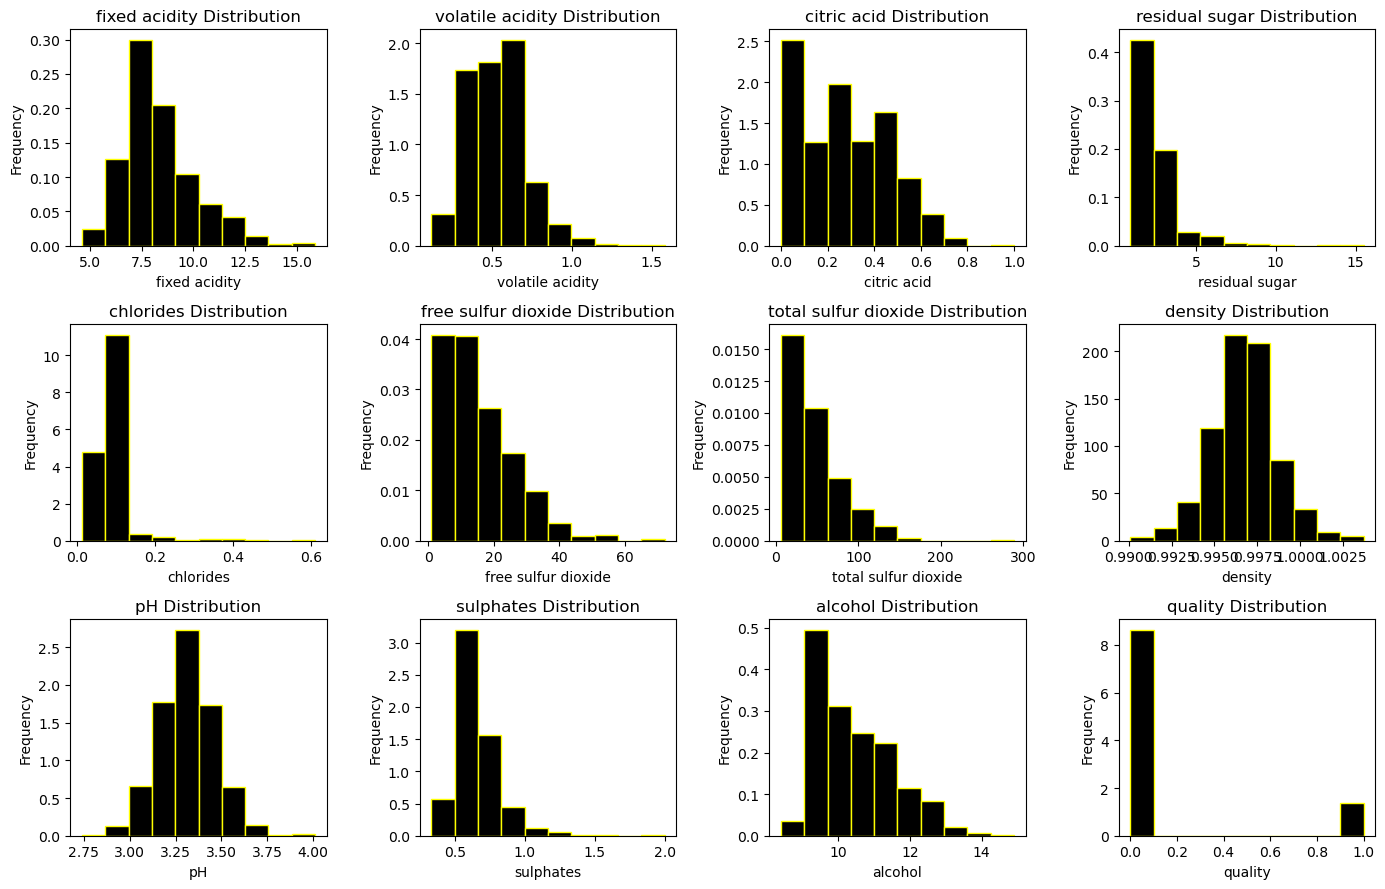

In [373]:
# c
fig, axs = plt.subplots(3, 4, figsize=(14, 9))
for i, col in enumerate(data.columns):
    ax = axs[i//4, i%4]
    ax.hist(data[col], density=True, color='black', ec='yellow')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.set_title(f'{col} Distribution')
fig.tight_layout()
plt.show()

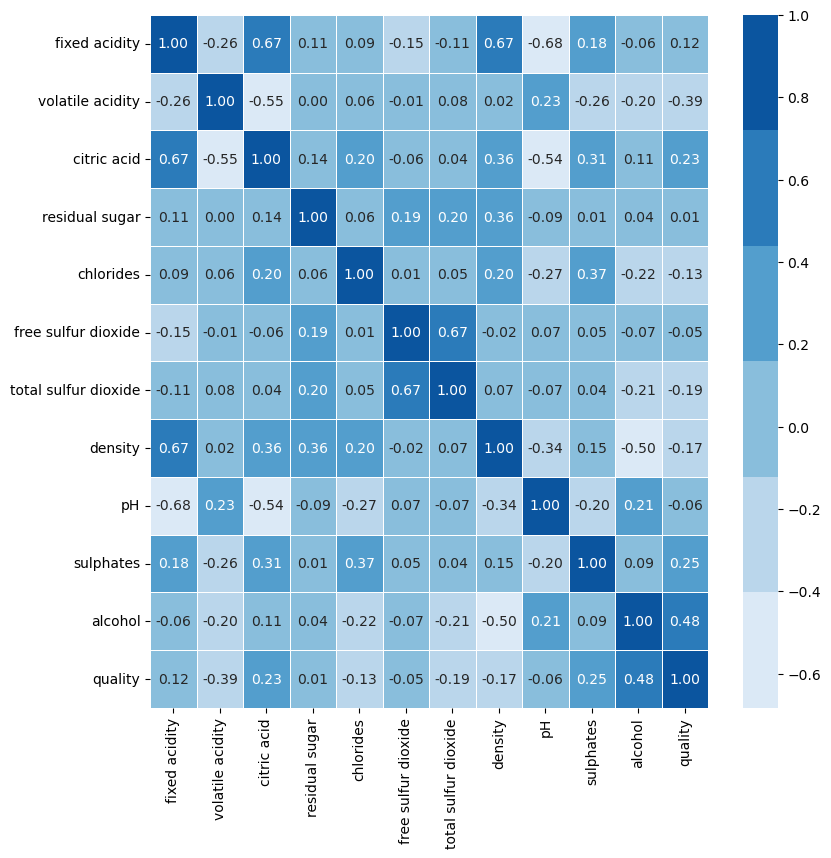

In [351]:
# d
corr_matrix = data.corr()
plt.subplots(figsize=(9, 9))
colormap = sns.color_palette("Blues")
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt='.2f', cmap=colormap)
plt.show()

# Conclusions
#### Highest Direct Correlation is .67 between:
* Fixed acidity & density, free sulphur dioxide & total sulphur dioxide, citric acid & fixed acidity
#### Highest Inverse Correlation is -.68 between:
* pH & fixed acidity
#### Correlations with Target (Quality):
* Alcohol has .48 relation with Quality, Sulphates & citric acid has medium Linear correlation with quality 

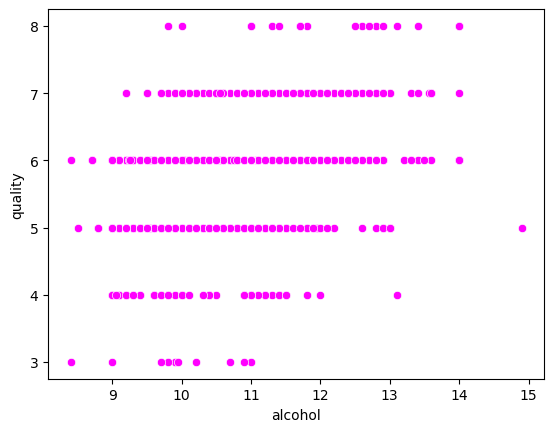

In [352]:
# e - visualise whether any attributes are related to the target variable
data.sample(6)
sns.scatterplot(x='alcohol', y='quality', data=data, color='magenta')
plt.show()

### Q.2 Generate pair-plot for the data


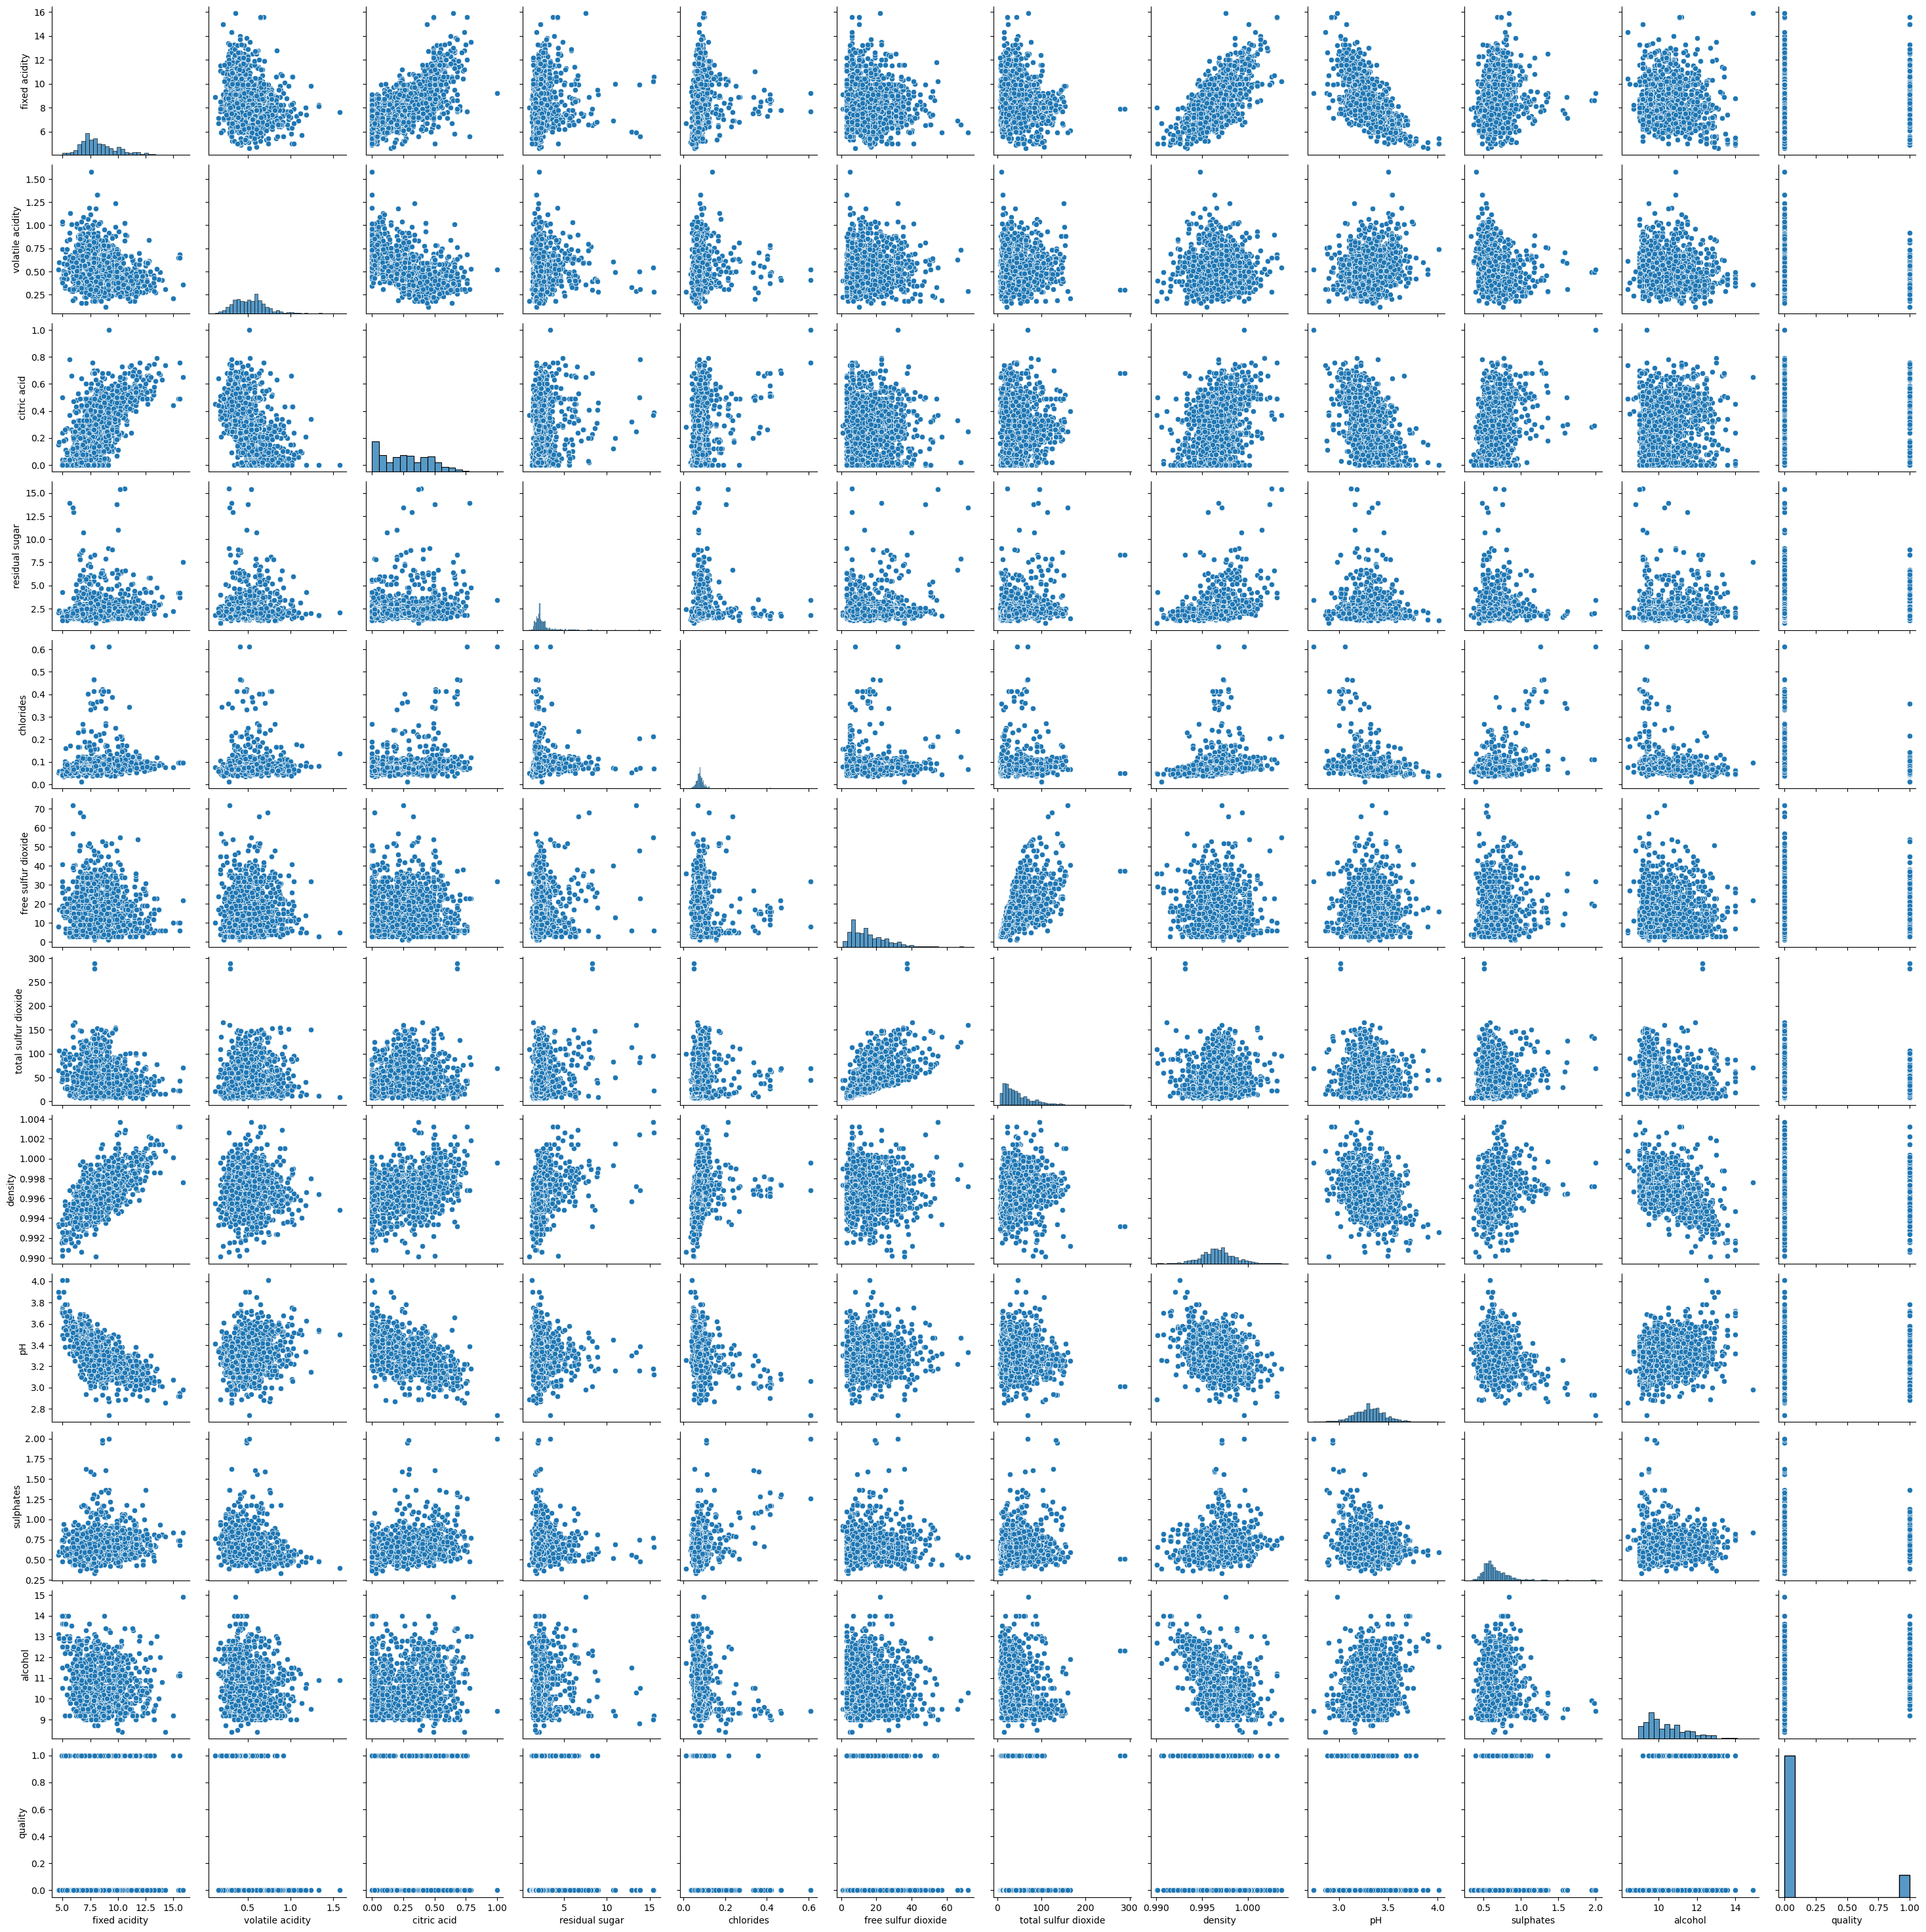

In [374]:
sns.pairplot(data)
plt.show()

### Q.3 Generate a count plot for the target variable (quality)


<Axes: xlabel='quality', ylabel='count'>

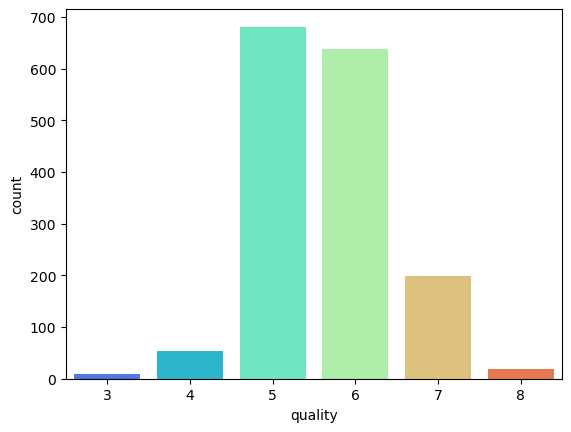

In [354]:
sns.countplot(x='quality', data=data, palette='rainbow')

### Q.4 Converting the target variable 'Quality' to categorical, such that 
<br>Wines having the “Quality” value > 6.5  are assigned value 1, and 
<br> Wines having the “Quality” value < 6.5, are assigned value 0
<br> Where 0: Ordinary Quality of wine and 1: High quality of wine


In [355]:
def convert_quality(x):
    return 1 if x > 6.5 else 0

data['quality'] = data.quality.apply(convert_quality)
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

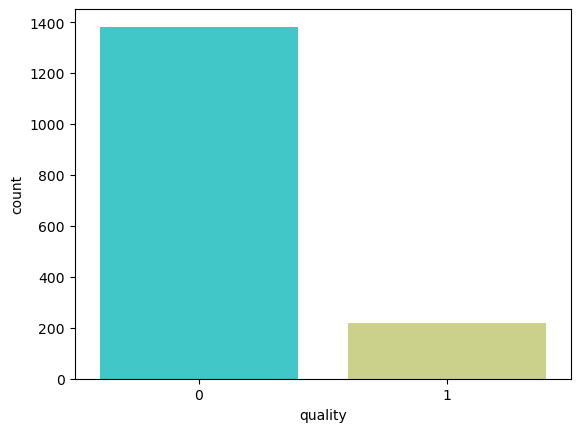

In [356]:
sns.countplot(data=data,x='quality',palette='rainbow')
plt.show()

### Q.5 Build a Random Forest classifier, to predict whether a particular wine is ordinary or of high quality. Perform Hyperparameter Tuning to improve the accuracy of the model (WITHOUT)

In [357]:
from sklearn.model_selection import train_test_split
features = data.drop(columns='quality')
target = data['quality']

# ------

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)

In [358]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [359]:
y_pred = rfc.predict(X_test)

In [360]:
from sklearn.metrics import r2_score, mean_squared_error
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy is {}%".format(round(acc,2)))
print("Mean Squared Error is {}%".format(round(mean_squared_error(y_test, y_pred),2)))

Accuracy is 90.0%
Mean Squared Error is 0.1%


### Q.5 Build a Random Forest classifier, to predict whether a particular wine is ordinary or of high quality. Perform Hyperparameter Tuning to improve the accuracy of the model (WITH)

In [361]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)
rfc_2 = RandomForestClassifier(n_jobs=-1, oob_score=True, max_samples=780, n_estimators= 9, max_depth = None, max_features=3)
rfc_2.fit(X_train, y_train)

RandomForestClassifier(max_features=3, max_samples=780, n_estimators=9,
                       n_jobs=-1, oob_score=True)

In [362]:
y_pred2 = rfc_2.predict(X_test)

In [363]:
from sklearn.metrics import r2_score, mean_squared_error
acc = accuracy_score(y_test, y_pred2) * 100
print("Accuracy is {}%".format(round(acc,2)))
print("Mean Squared Error is {}%".format(round(mean_squared_error(y_test, y_pred2),2)))

Accuracy is 88.44%
Mean Squared Error is 0.12%


### Cross-Validation For More Accuracy

In [364]:
from sklearn.model_selection import cross_val_score
print("Accuracy is {}%".format(round(np.mean(cross_val_score(RandomForestClassifier(),features,target,cv=15,scoring='accuracy')),2)*100))

Accuracy is 88.0%
